In [9]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

Ind_low_power = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_Ind_SA5_new/Energy_from_He_Test/outputs/dispatch_annual_summary.csv")
Ind_low_power = Ind_low_power.groupby([
    pd.Grouper ('period')
]).sum()
Ind_low_power = Ind_low_power/1000
Ind_low_power.rename_axis('PERIOD')

RE_low_power = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_RE_SA5_new/Energy_from_He_Test/outputs/dispatch_annual_summary.csv")
RE_low_power = RE_low_power.groupby([
    pd.Grouper ('period')
]).sum()
RE_low_power = RE_low_power/1000
RE_low_power.rename_axis('PERIOD')

Demand_low_power = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_Demand_SA5_new/Energy_from_He_Test/outputs/dispatch_annual_summary.csv")
Demand_low_power = Demand_low_power.groupby([
    pd.Grouper ('period')
]).sum()
Demand_low_power = Demand_low_power/1000
Demand_low_power.rename_axis('PERIOD')



,Energy_GWh_typical_yr,VariableCost_per_yr,DispatchEmissions_tCO2_per_typical_yr
PERIOD,,,
2023,9671.724866,2.371811e+07,5.368751e+06
2028,10967.435976,2.043170e+07,3.751437e+06
2033,12174.427508,2.225150e+07,3.370425e+06
2038,14061.606116,2.224703e+07,1.668913e+06
2043,15458.597323,2.471643e+07,5.821702e+05
2048,17217.901448,2.509516e+07,5.597413e+05


In [10]:
Ind_low_cost = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_Ind_SA5_new/Energy_from_He_Test/outputs/electricity_cost.csv")
Ind_low_cost = Ind_low_cost.groupby([
    pd.Grouper ('PERIOD')
]).sum()


RE_low_cost = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_RE_SA5_new/Energy_from_He_Test/outputs/electricity_cost.csv")
RE_low_cost = RE_low_cost.groupby([
    pd.Grouper ('PERIOD')
]).sum()


Demand_low_cost = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_Demand_SA5_new/Energy_from_He_Test/outputs/electricity_cost.csv")
Demand_low_cost = Demand_low_cost.groupby([
    pd.Grouper ('PERIOD')
]).sum()


In [16]:
Ind_low_emis = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_Ind_SA5_new/Energy_from_He_Test/outputs/emissions.csv")
Ind_low_emis = Ind_low_emis.groupby([
    pd.Grouper ('PERIOD')
]).sum()


RE_low_emis = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_RE_SA5_new/Energy_from_He_Test/outputs/emissions.csv")
RE_low_emis = RE_low_emis.groupby([
    pd.Grouper ('PERIOD')
]).sum()

Demand_low_emis = pd.read_csv("/Users/liqunp/OneDrive/Home/Work/Switch_2020_slow_Demand_SA5_new/Energy_from_He_Test/outputs/emissions.csv")
Demand_low_emis = Demand_low_emis.groupby([
    pd.Grouper ('PERIOD')
]).sum()



In [17]:
years= [2023, 2028, 2033, 2038, 2043, 2048]
filled_cost = pd.DataFrame(index=years)
filled_cost.index.name = 'PERIOD'
filled_cost["Ind_low"] = 0
filled_cost["Demand_low"] = 0
filled_cost["RE_low"] = 0
filled_cost

,Ind_low,Demand_low,RE_low
PERIOD,,,
2023,0,0,0
2028,0,0,0
2033,0,0,0
2038,0,0,0
2043,0,0,0
2048,0,0,0


In [18]:
for year in years:
    filled_cost.loc[year, "Ind_low"] = Ind_low_cost.loc[year, "SystemCostPerPeriod_Real"]/Ind_low_power.loc[year, "Energy_GWh_typical_yr"]/1000000
    filled_cost.loc[year, "RE_low"] = RE_low_cost.loc[year, "SystemCostPerPeriod_Real"]/RE_low_power.loc[year, "Energy_GWh_typical_yr"]/1000000
    filled_cost.loc[year, "Demand_low"] = Demand_low_cost.loc[year, "SystemCostPerPeriod_Real"]/Demand_low_power.loc[year, "Energy_GWh_typical_yr"]/1000000 
   

In [19]:
years= [2023, 2028, 2033, 2038, 2043, 2048]

filled_emis = pd.DataFrame(index=years)
filled_emis.index.name = 'PERIOD'
filled_emis["Ind_low"] = 0
filled_emis["Demand_low"] = 0
filled_emis["RE_low"] = 0
for year in years:
    filled_emis.loc[year, "Ind_low"] = Ind_low_emis.loc[year, "AnnualEmissions_tCO2_per_yr"]/1000000
    filled_emis.loc[year, "RE_low"] = RE_low_emis.loc[year, "AnnualEmissions_tCO2_per_yr"]/1000000
    filled_emis.loc[year, "Demand_low"] = Demand_low_emis.loc[year, "AnnualEmissions_tCO2_per_yr"]/1000000
  

In [20]:
for year in years:
    filled_emis.loc[year, "Ind_low"] = Ind_low_emis.loc[year, "AnnualEmissions_tCO2_per_yr"]/Ind_low_power.loc[year, "Energy_GWh_typical_yr"]/10000
    filled_emis.loc[year, "RE_low"] = RE_low_emis.loc[year, "AnnualEmissions_tCO2_per_yr"]/RE_low_power.loc[year, "Energy_GWh_typical_yr"]/10000
    filled_emis.loc[year, "Demand_low"] = Demand_low_emis.loc[year, "AnnualEmissions_tCO2_per_yr"]/Demand_low_power.loc[year, "Energy_GWh_typical_yr"]/10000 
   

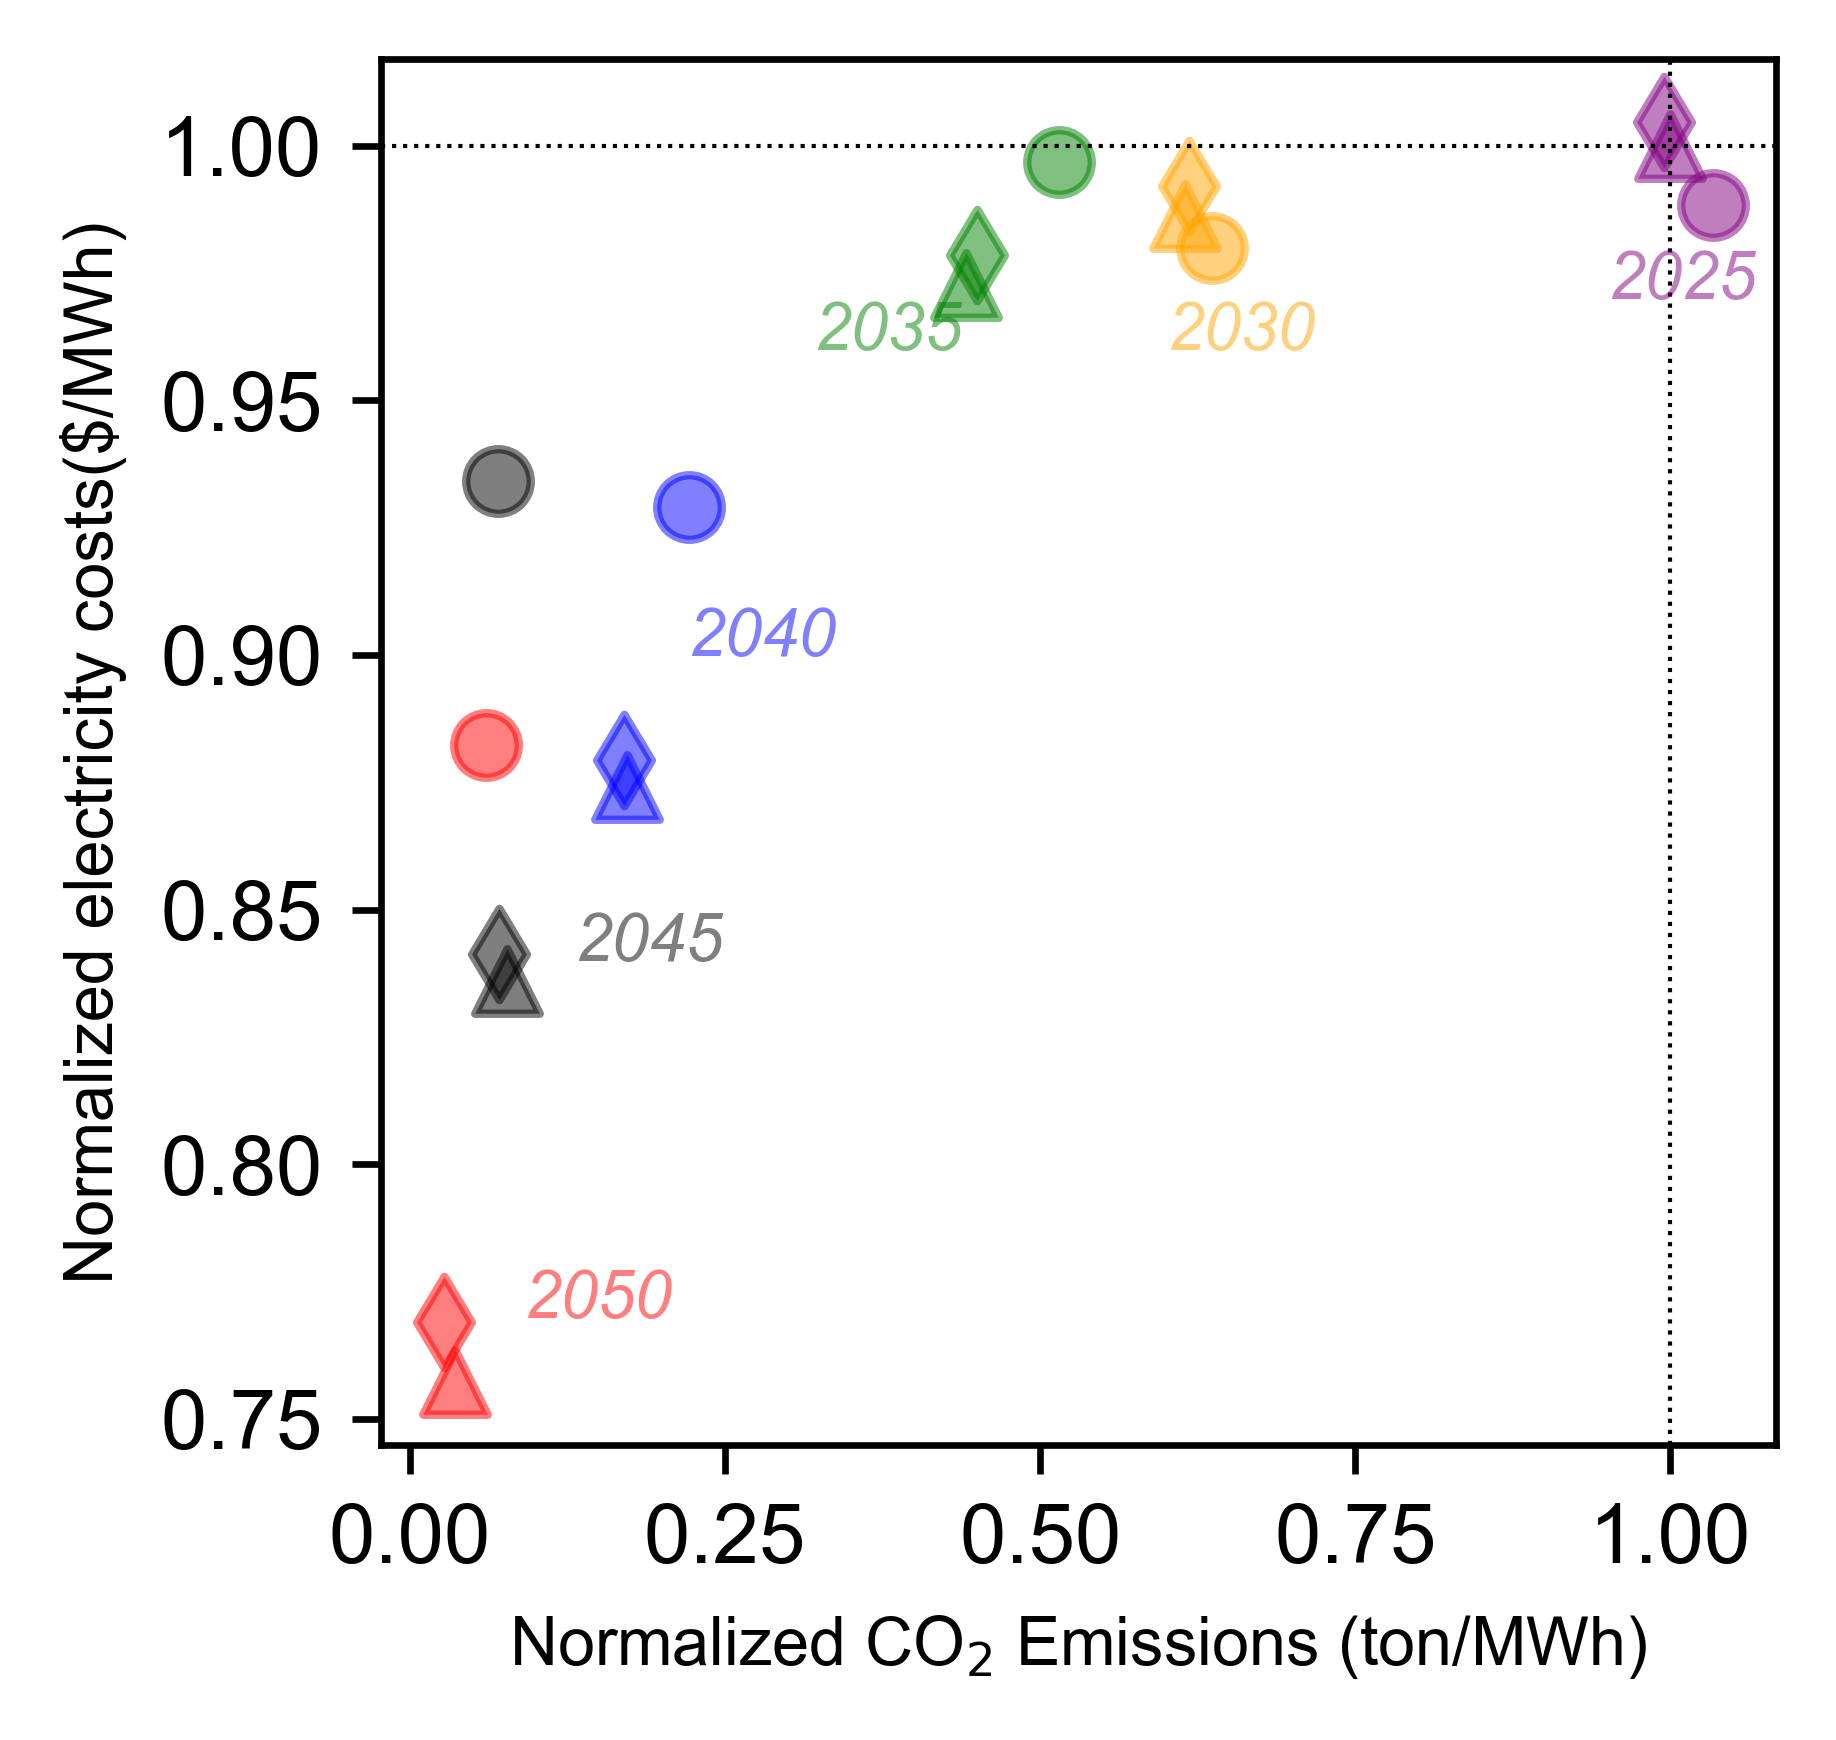

In [36]:
fig = plt.figure(figsize=(3, 3), dpi=600)
years = [2023, 2028, 2033, 2038, 2043, 2048]

colors = ['purple','orange','green','blue','black','red']
for i, year in enumerate(years):
    x1 = filled_emis.loc[year,"Ind_low"]/filled_emis.loc[2023,"Ind_low"]
    x2 = filled_emis.loc[year,"RE_low"]/filled_emis.loc[2023,"Ind_low"]
    x3 = filled_emis.loc[year,"Demand_low"]/filled_emis.loc[2023,"Ind_low"]


    y1 = filled_cost.loc[year,"Ind_low"]/filled_cost.loc[2023,"Ind_low"]
    y2 = filled_cost.loc[year,"RE_low"]/filled_cost.loc[2023, "Ind_low"]
    y3 = filled_cost.loc[year,"Demand_low"]/filled_cost.loc[2023, "Ind_low"]


    plt.scatter(x1, y1, label = 'Grid-Low-R', marker='^',s = 60, color=colors[i],alpha=0.5)
    plt.scatter(x2, y2, label = 'RE_low-R', marker='d',s = 60, color=colors[i],alpha=0.5)
    plt.scatter(x3, y3, label = 'Demand-Low-R', marker='o',s = 60, color=colors[i],alpha=0.5)


plt.axhline(y = 1, color = 'black',linestyle = ':', lw=0.5)
plt.axvline(x = 1, color = 'black',linestyle = ':', lw=0.5)


plt.text(0.95, 0.97, '2025', fontsize=8, color = 'purple', fontname = 'Arial', style='italic', alpha=0.5)
plt.text(0.6, 0.96, '2030', fontsize=8, color = 'orange', fontname = 'Arial', style='italic', alpha=0.5)
plt.text(0.32, 0.96, '2035', fontsize=8, color = 'green', fontname = 'Arial', style='italic', alpha=0.5)
plt.text(0.22, 0.9, '2040', fontsize=8, color = 'blue', fontname = 'Arial', style='italic', alpha=0.5)
plt.text(0.13, 0.84, '2045', fontsize=8, color = 'black', fontname = 'Arial', style='italic', alpha=0.5)
plt.text(0.09, 0.77, '2050', fontsize=8, color = 'red', fontname = 'Arial', style='italic', alpha=0.5)



plt.xticks(fontname = 'Arial', size =10)
plt.yticks(fontname = 'Arial',fontsize=10,color = 'black')

plt.xlabel('Normalized CO$_{2}$ Emissions (ton/MWh)', size = 8, fontname = 'Arial') 
plt.ylabel('Normalized electricity costs($/MWh)', size = 8, fontname = 'Arial')


# plt.legend(frameon=False, bbox_to_anchor=(1.78, 0.5),loc = 'right', ncol=1)

plt.savefig(f"/Users/liqunp/Desktop/slow111.png", bbox_inches='tight')